## Simulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import scipy.stats as stats
from sklearn.model_selection import train_test_split

### Plusieurs fois la simulation : avec l'hypothèse alternative

In [2]:
def power_simulation(n, m, num_simulations):

    np.random.seed(42)
    power = []
    esperances = []
    variances = []
    test_statistics = []
    test_alternative = []
    beta1 = 2
    beta2_values = np.linspace(0, 0.16, 9)
    delta_list = []
    epsilon = np.random.normal(0, 1, n + m)  # Generate epsilon inside the loop
    x = np.random.uniform(0, 5, n + m)

    for beta2 in beta2_values:

        differences = []

        for _ in range(num_simulations):
            
            y = beta1 * x + beta2 * x**2 + epsilon

            x_reshape = x.reshape(-1,1)

            x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=m, random_state=None)

            # Linear Model
            model_a1 = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
            y_pred_a1 = model_a1.predict(x_test.reshape(-1, 1))
            mse_a1 = mean_squared_error(y_test, y_pred_a1)

            # Quadratic Model
            x_train_quad = np.column_stack((x_train, x_train**2))
            x_test_quad = np.column_stack((x_test, x_test**2))
            
            model_a2 = LinearRegression().fit(x_train_quad, y_train)
            y_pred_a2 = model_a2.predict(x_test_quad)
            mse_a2 = mean_squared_error(y_test, y_pred_a2)

            differences.append(mse_a1 - mse_a2)

        d_barre = sum(differences)/num_simulations 
        var = np.var(differences, ddof=1)
        test_stat = (num_simulations**0.5)*d_barre/np.sqrt(var) # Statistique pour l'hypothèse nulle

        delta = d_barre
        student = stats.t.ppf(0.95, df=num_simulations-1)
        mu = (num_simulations ** 0.5)*delta/np.sqrt(var)
        test_alt = student - mu
        puissance = 1 - stats.norm.cdf(student - mu, 0, 1)
       
        delta_list.append(delta)
        esperances.append(d_barre)
        variances.append(var)
        test_statistics.append(test_stat)
        test_alternative.append(test_alt)
        power.append(puissance)

    return esperances, variances, test_statistics, test_alternative, power


In [3]:
esperances, variances, test_statistics, test_alternative, power = power_simulation(150, 2000, 1000)

print(f"Espérances: {esperances}")
print(f"Variances: {variances}")
print(f"Statistiques de test: {test_statistics}")
print(f"Test alternative: {test_alternative}")
print(f"Puissance: {power}")

Espérances: [-0.007241953611778996, -0.005432871243013092, -0.0018397337207315737, 0.007732151294664652, 0.01741705382171409, 0.029618462870764802, 0.04565926993601394, 0.06447735662266213, 0.08615927375856706]
Variances: [0.00010880183334681446, 0.00011388512795720679, 0.00014251517609372726, 9.437326997964423e-05, 0.00012691190958667291, 0.00015901402103513183, 0.0001514447861889206, 0.0001810233316754894, 0.00017973406456859412]
Statistiques de test: [-21.955211842839933, -16.09888898204038, -4.873314188585672, 25.169572637355483, 48.89039031900252, 74.27536693324161, 117.32803572807856, 151.54441918577103, 203.2295388781351]
Test alternative: [23.601592188267468, 17.745269327467913, 6.519694534013207, -23.52319229192795, -47.24400997357498, -72.62898658781408, -115.68165538265103, -149.8980388403435, -201.58315853270756]
Puissance: [0.0, 0.0, 3.522537816991189e-11, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


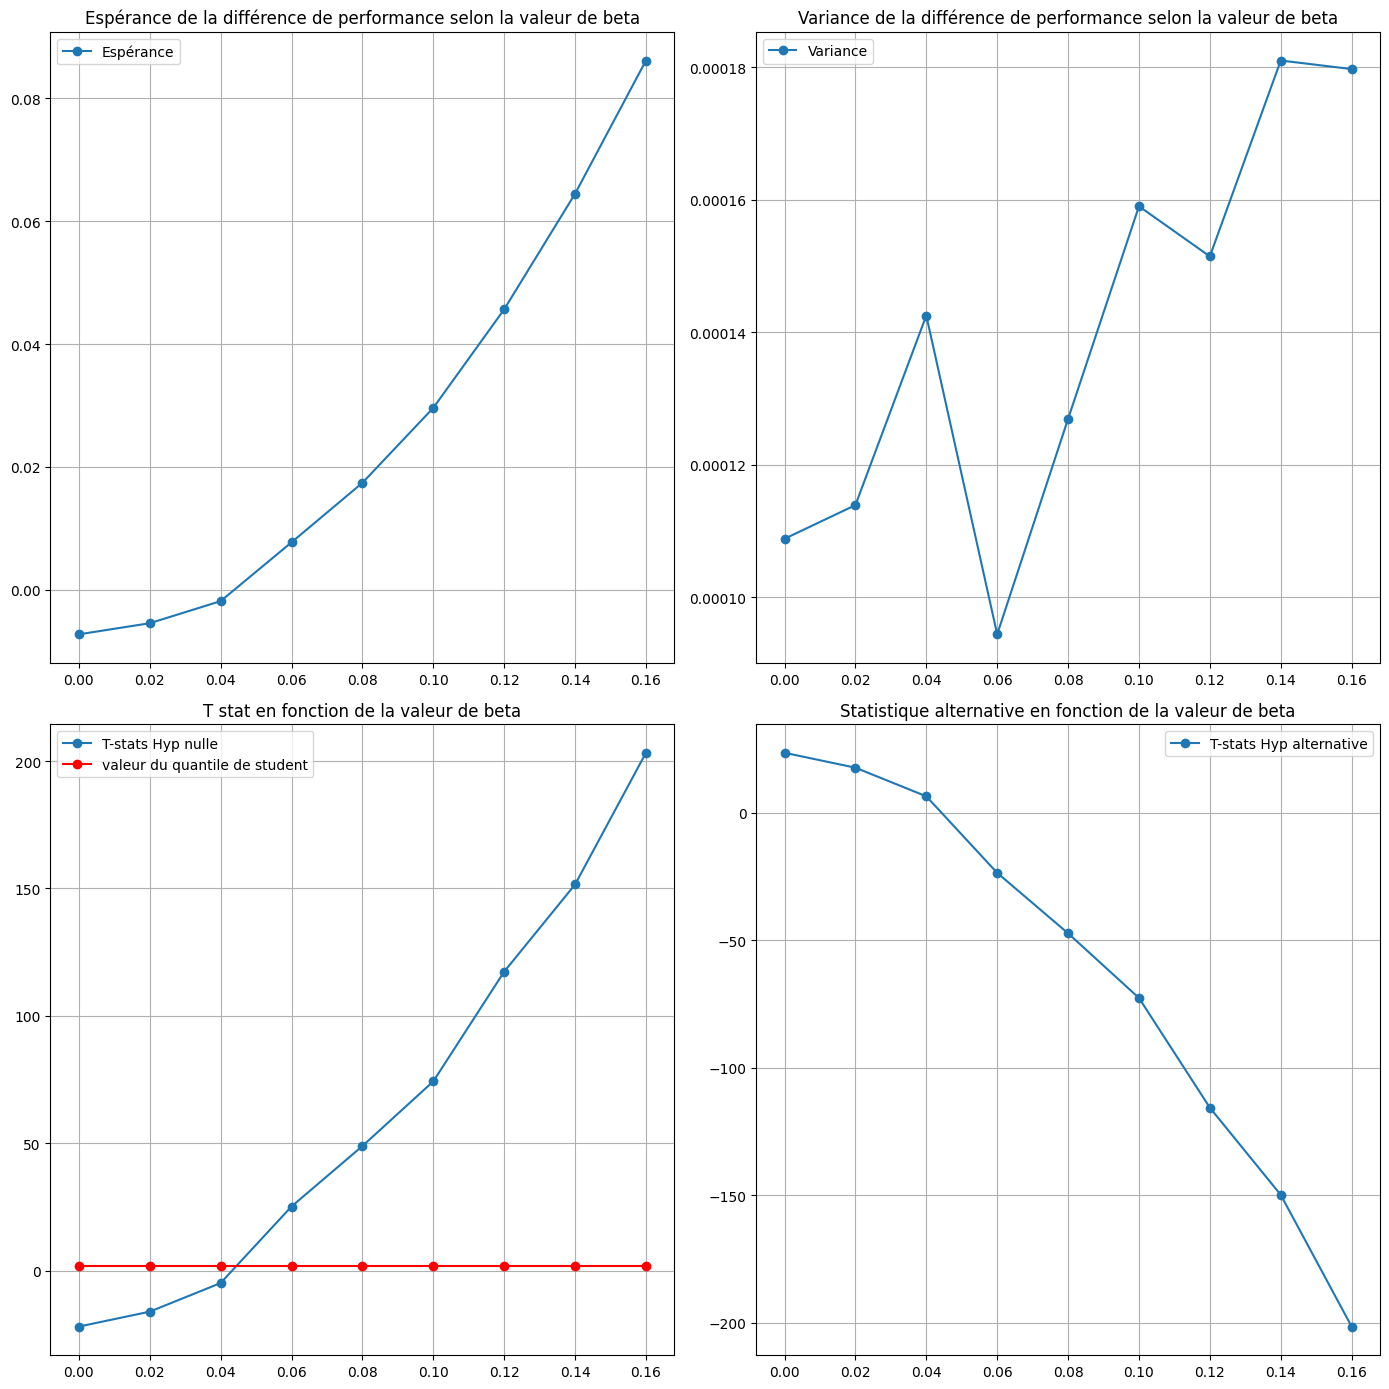

In [4]:
beta2_values = np.linspace(0, 0.16, 9)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

# Premier sous-graphe : Espérance
axes[0, 0].plot(beta2_values, esperances, label='Espérance', marker='o')
axes[0, 0].set_title('Espérance de la différence de performance selon la valeur de beta')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Deuxième sous-graphe : Variance
axes[0, 1].plot(beta2_values, variances, label='Variance', marker='o')
axes[0, 1].set_title('Variance de la différence de performance selon la valeur de beta')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Troisième sous-graphe : T-stat Hyp nulle
axes[1, 0].plot(beta2_values, test_statistics, label='T-stats Hyp nulle', marker='o')
axes[1, 0].plot(beta2_values, [stats.t.ppf(0.95, df=9)]*len(beta2_values), label='valeur du quantile de student', color='r', marker='o')
axes[1, 0].set_title('T stat en fonction de la valeur de beta')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Quatrième sous-graphe : T-stat Hyp alternative
axes[1, 1].plot(beta2_values, test_alternative, label='T-stats Hyp alternative', marker='o')
axes[1, 1].set_title('Statistique alternative en fonction de la valeur de beta')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

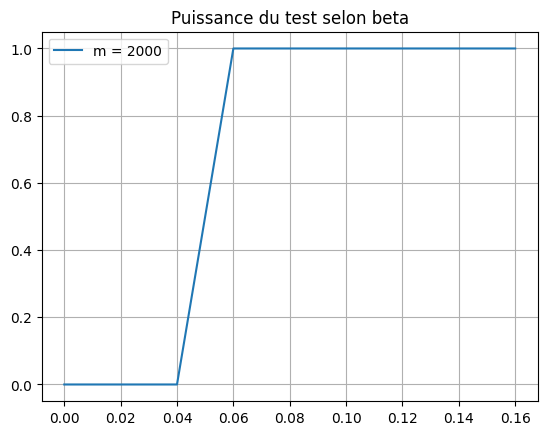

In [5]:
beta2_values = np.linspace(0, 0.16, 9)

plt.figure()
plt.title("Puissance du test selon beta")
plt.plot(beta2_values, power, label = "m = 2000")
plt.grid()
plt.legend()
plt.show()

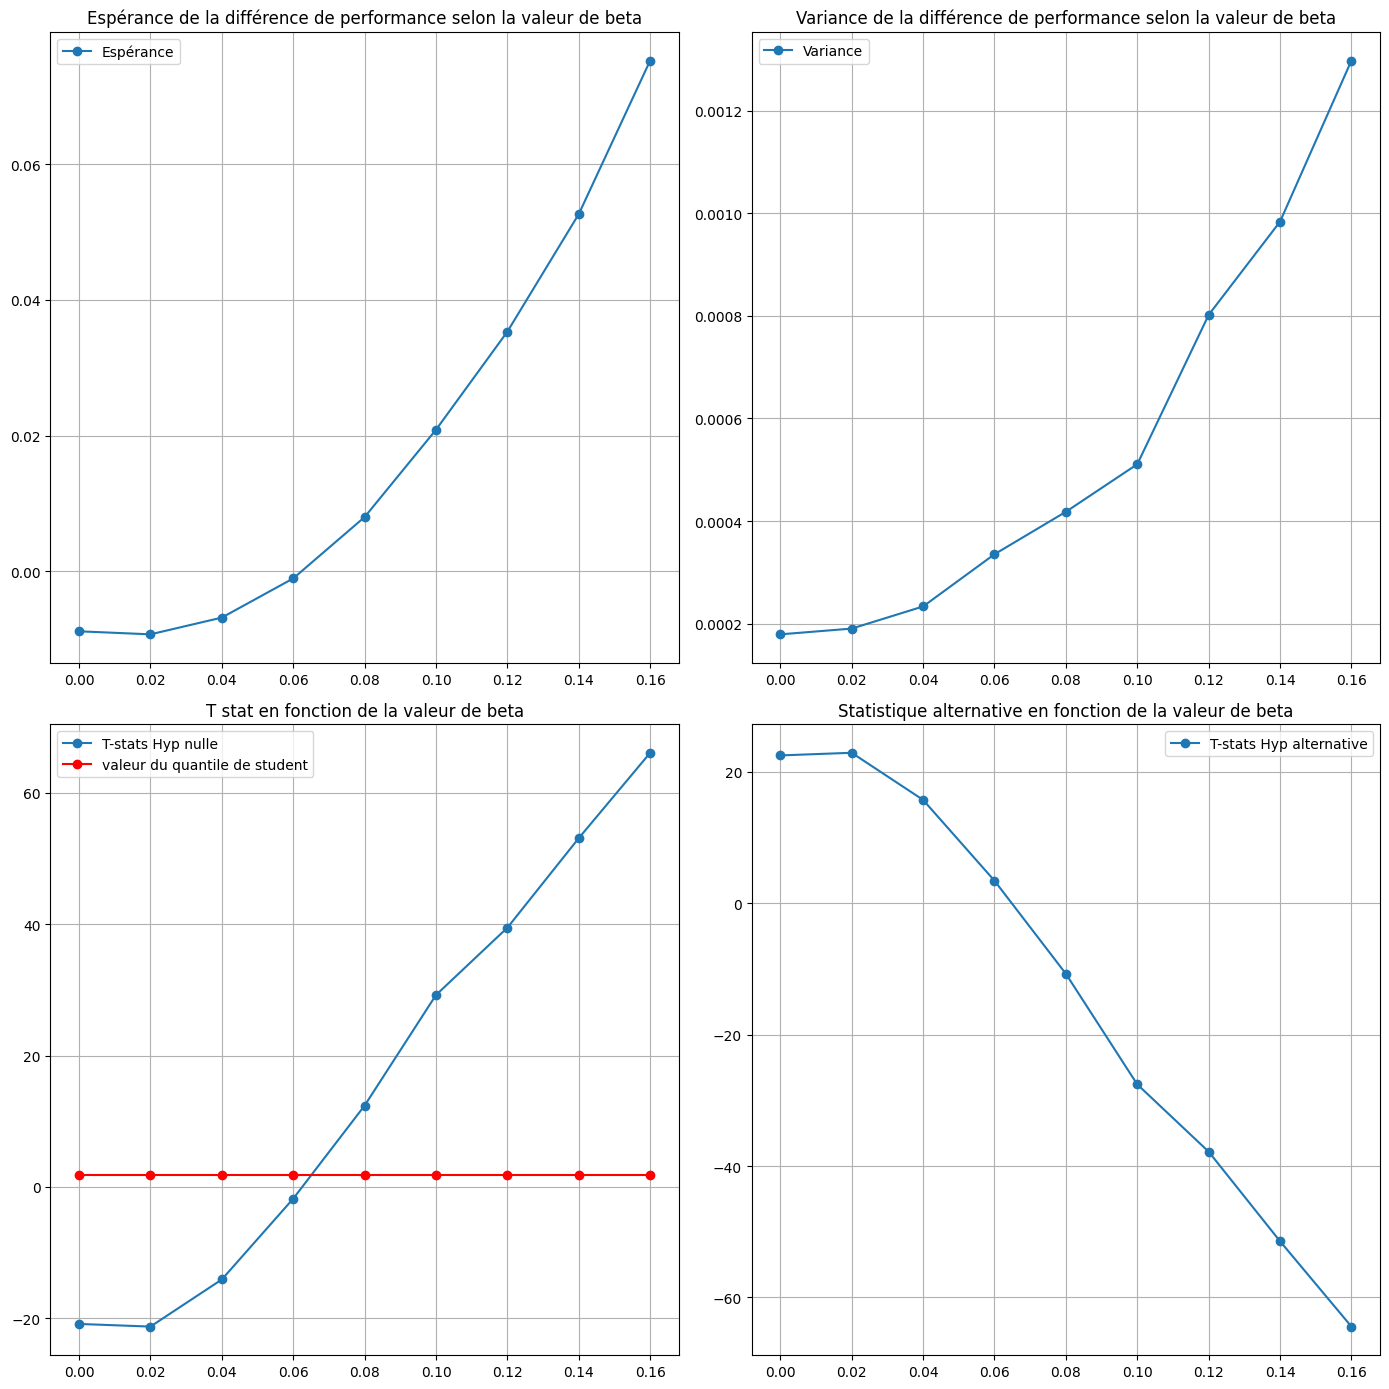

In [6]:
esperances150, variances150, test_statistics150, test_alternative150, power150 = power_simulation(150, 150, 1000)

beta2_values = np.linspace(0, 0.16, 9)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

# Premier sous-graphe : Espérance
axes[0, 0].plot(beta2_values, esperances150, label='Espérance', marker='o')
axes[0, 0].set_title('Espérance de la différence de performance selon la valeur de beta')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Deuxième sous-graphe : Variance
axes[0, 1].plot(beta2_values, variances150, label='Variance', marker='o')
axes[0, 1].set_title('Variance de la différence de performance selon la valeur de beta')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Troisième sous-graphe : T-stat Hyp nulle
axes[1, 0].plot(beta2_values, test_statistics150, label='T-stats Hyp nulle', marker='o')
axes[1, 0].plot(beta2_values, [stats.t.ppf(0.95, df=9)]*len(beta2_values), label='valeur du quantile de student', color='r', marker='o')
axes[1, 0].set_title('T stat en fonction de la valeur de beta')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Quatrième sous-graphe : T-stat Hyp alternative
axes[1, 1].plot(beta2_values, test_alternative150, label='T-stats Hyp alternative', marker='o')
axes[1, 1].set_title('Statistique alternative en fonction de la valeur de beta')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

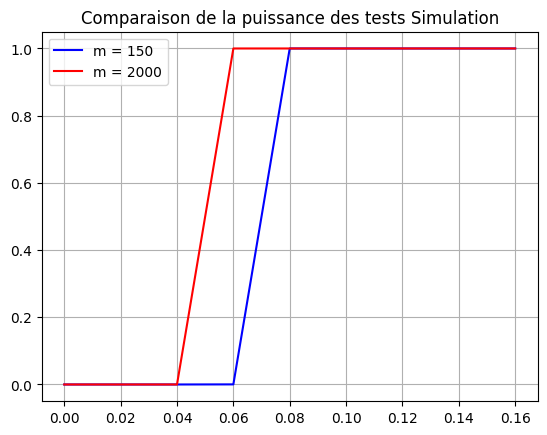

In [7]:
plt.figure()
plt.title("Comparaison de la puissance des tests Simulation")
plt.plot(beta2_values, power150, label = "m = 150", color = "Blue")
plt.plot(beta2_values, power, label = "m = 2000", color = "Red")
plt.grid()
plt.legend()
plt.show()

In [8]:
df_150 = pd.DataFrame(power150)
df_2000 = pd.DataFrame(power)

In [11]:
real_data = {
    "β₂": [0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160],
    "Simulation m=2000": [0.000, 0.029, 0.835, 0.997, 1.000, 1.000, 1.000, 1.000, 1.000],
    "Simulation m=150": [0.000, 0.287, 0.609, 0.764, 0.875, 0.933, 0.971, 0.988, 0.997],
    "Competition OOB": [0.072, 0.186, 0.451, 0.683, 0.833, 0.912, 0.953, 0.981, 0.990],
    "Real World OOB": [0.054, 0.114, 0.297, 0.554, 0.778, 0.925, 0.984, 0.996, 1.000],
    "Real World OOB-2n": [0.059, 0.174, 0.499, 0.840, 0.973, 0.997, 1.000, 1.000, 1.000],
    "Real World CV": [0.054, 0.109, 0.279, 0.523, 0.777, 0.926, 0.978, 0.996, 1.000]
}

real_df = pd.DataFrame(real_data)
real_df

,β₂,Simulation m=2000,Simulation m=150,Competition OOB,Real World OOB,Real World OOB-2n,Real World CV
0,0.00,0.000,0.000,0.072,0.054,0.059,0.054
1,0.02,0.029,0.287,0.186,0.114,0.174,0.109
2,0.04,0.835,0.609,0.451,0.297,0.499,0.279
3,0.06,0.997,0.764,0.683,0.554,0.840,0.523
4,0.08,1.000,0.875,0.833,0.778,0.973,0.777
5,0.10,1.000,0.933,0.912,0.925,0.997,0.926
6,0.12,1.000,0.971,0.953,0.984,1.000,0.978
7,0.14,1.000,0.988,0.981,0.996,1.000,0.996
8,0.16,1.000,0.997,0.990,1.000,1.000,1.000


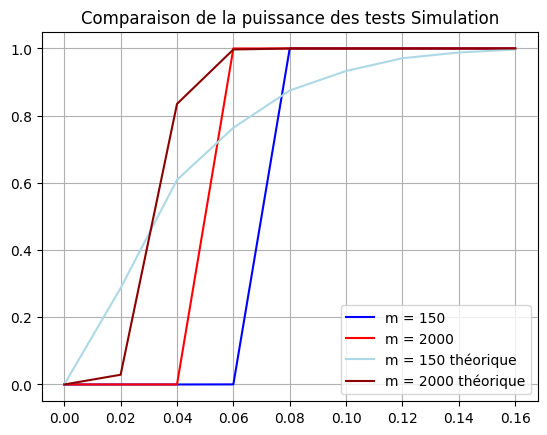

In [13]:
plt.figure()
plt.title("Comparaison de la puissance des tests Simulation")
plt.plot(beta2_values, power150, label = "m = 150", color = "Blue")
plt.plot(beta2_values, power, label = "m = 2000", color = "Red")
plt.plot(beta2_values, real_df["Simulation m=150"], label = "m = 150 théorique", color = "lightblue")
plt.plot(beta2_values, real_df["Simulation m=2000"], label = "m = 2000 théorique", color = "darkred")
plt.grid()
plt.legend()
plt.show()